<a href="https://colab.research.google.com/github/jianfeiZhao/Machine-Learning-basic/blob/master/boston_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.datasets import load_boston

# load data
data = load_boston()
X = data['data']
y = data['target']

In [0]:
y = y.reshape(y.shape[0],1)

# normalize data
X = (X - np.mean(X,axis=0))/np.std(X,axis=0)

n_features = X.shape[1]
n_hidden = 10
w1 = np.random.randn(n_features, n_hidden)
b1 = np.zeros(n_hidden)
w2 = np.random.randn(n_hidden, 1)
b2 = np.zeros(1)

# relu function
def Relu(x):
  result = np.where(x<0, 0, x)
  return result

def Linear(X, w, b):
  y = X.dot(w) + b
  return y

def MSE_loss(y, y_hat):
  return np.mean(np.square(y_hat-y))

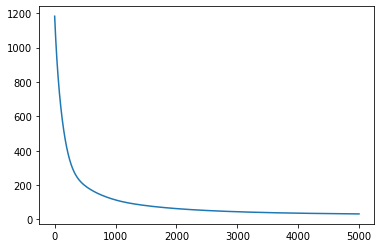

w1=[[ 0.12218654  0.89181467  0.23369821  0.81320964 -0.89872946 -1.08661881
  -0.35855213  0.16576709  0.74374419  0.93587665]
 [-0.58496469  1.04939072  0.71750605  1.60884873 -0.19017604 -3.68504611
  -0.42115187 -0.7233334   0.4510918  -0.0688662 ]
 [-0.60537081 -2.29341684  0.11703852  0.89888797  1.08546513  0.70496849
  -0.75173106 -1.30099754 -0.67122341 -0.2246911 ]
 [-0.45712061 -1.42162395 -0.44316193 -0.32086216 -1.27180579  0.68300734
  -1.51539064  0.08637286  0.60105296 -0.63263236]
 [-0.37476091  0.10187689  0.33169472 -2.51829849 -0.27953513  0.94195273
  -0.0589991  -2.24514176 -0.28049716 -1.21356862]
 [ 0.08460369 -1.24514233 -1.25358253  0.25172915 -0.04559735 -0.22903621
  -1.62780587  2.48791634 -1.30494491 -0.54650883]
 [ 1.68197229  0.53344237  0.02502483  0.45786091  0.53497188  0.25611113
  -0.17196896  0.34851486  0.02542793 -0.74872885]
 [ 0.10777582 -0.13670149 -0.35952424 -0.52736777  0.43304304 -1.10371669
  -0.44715442  0.30241823 -1.50572399 -0.2687139

In [0]:
from matplotlib import pyplot as plt

epoch = 5000
learning_rate = 1e-7
loss = []

for t in range(epoch):
  # forward pass
  l1 = Linear(X, w1, b1)
  s1 = Relu(l1)
  y_pred = Linear(s1, w2, b2)

  # calculate loss
  loss.append(MSE_loss(y, y_pred))

  # backward pass
  grad_y_pred = 2.0*(y_pred-y)
  grad_w2 = s1.T.dot(grad_y_pred)
  grad_temp_relu = grad_y_pred.dot(w2.T)
  grad_temp_relu[l1<0] = 0
  grad_w1 = X.T.dot(grad_temp_relu)

  # weight update
  w1 = w1 - learning_rate * grad_w1
  w2 = w2 - learning_rate * grad_w2

plt.plot(np.arange(epoch), loss)
plt.show()

print('w1={}\n w2={}'.format(w1,w2))